In [1]:
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
%config linelineBacked.figure_format = {'png', 'retina'}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.linear_model
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
#pip install plotly==3.8.1
import cufflinks as cf
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [12]:
df_final = pd.read_excel("./datas/final_X.xls",'final_X')
df_final = df_final.drop(["Unnamed: 0"], axis=1)
df_final.head()

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country
0,-0.0323,AAPL,"컴퓨터, 전화 및 가전제품",269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48
1,0.0263,AAPL,"컴퓨터, 전화 및 가전제품",-175.0,175.0,-0.015,2002-01-15,테러,영원한자유작전-필리핀,115800,2
2,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,-0.007,2002-10-07,테러,영원한자유작전-아프리카의뿔,500000,38
3,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.016,2003-03-20,테러,이라크전쟁,1000000,41
4,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.009,2004-04-01,민족,이란-PJAK충돌,17000,3


In [13]:
ls_war_X2 = pd.read_excel('datas/ls_war_X2.xls', sheet_name='sheet')
ls_war_X2.head(1)

,Start_date,War_name,War_kind,Abs_sum,Count,Count_country,War_volume,War_id
0,2001-09-11,테러와의전쟁,테러,45139,1,48,1000000,w1


## 전쟁은 전쟁규모 순위와 주식변동점수 순위와 동일하지 않다.
 - 전쟁 규모가 크다고 해서, 그 전쟁의 주식평균 변동의 폭이 크다고 할 수 없다.

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], name='전쟁규모', x = ls_war_X2['War_name']))
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, name='주식변동점수(X10)', x = ls_war_X2['War_name']))
fig.update_layout(title='<b> 27번의 전쟁의 전쟁규모와 주식변동점수')
fig.show();

## 전쟁 종류에 따라서 전쟁규모순위와  주식변동점수의 순위 또한 다르다.

In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2['War_kind'], name='전쟁규모'))
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, x = ls_war_X2['War_kind'], name='평균변화율(X10)'))
fig.update_layout(title='<b> 5가지 갈등종류 : 테러, 민족, 내란, 마약, 해적')
fig.show();

## 갈등종류에 따른 전쟁규모 TOP2

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2[ls_war_X2['War_kind'] =='테러']['War_name'], name='테러'))
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2[ls_war_X2['War_kind'] =='내란']['War_name'], name='내란'))
fig.update_layout(title='<b> 갈등종류에 따른 전쟁규모 TOP2')
fig.show();

## 참전국가수는 전쟁규모 및 평균변화율의 순위에 영향은 미치지 못한다.

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, x = ls_war_X2['Count_country']))
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2['Count_country']))
fig.update_layout(title='<b> 참여 국가수에 대한 평균변화율')
fig.show();

## Symblo industry 전체 리스트 정보

In [18]:
industry = pd.read_csv("./datas/SYMB_Industry.csv")
industry

,Industry,IndustryCode
0,"건설 장비 및대형차, 기차, 배",521020
1,다양한 소매업,533010
2,레저 상품,532050
3,미디어 및 출판,533020
4,반도체 및 반도체 장비,571010
5,생명과학 및 메디컬 리서치,562020
6,섬유 및 의류,532020
7,소프트웨어 및 IT 서비스,572010
8,식품 및 담배,541020
9,식품 및 약품소매,543010


In [19]:
df_final = pd.read_excel("./datas/final_X.xls",'final_X')
df_final = df_final.drop(["Unnamed: 0"], axis=1)
df_final

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country
0,-0.0323,AAPL,"컴퓨터, 전화 및 가전제품",269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48
1,0.0263,AAPL,"컴퓨터, 전화 및 가전제품",-175.0,175.0,-0.015,2002-01-15,테러,영원한자유작전-필리핀,115800,2
2,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,-0.007,2002-10-07,테러,영원한자유작전-아프리카의뿔,500000,38
3,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.016,2003-03-20,테러,이라크전쟁,1000000,41
4,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.009,2004-04-01,민족,이란-PJAK충돌,17000,3
...,...,...,...,...,...,...,...,...,...,...,...
1013,0.0012,GOOG,소프트웨어 및 IT서비스,30.0,30.0,0.004,2014-05-16,내란,리비아 내전,400000,19
1014,0.0007,GOOG,소프트웨어 및 IT서비스,-70.0,70.0,-0.001,2014-06-13,테러,ISIL에대한국제군사개입,472260,41
1015,0.0120,GOOG,소프트웨어 및 IT서비스,-200.0,200.0,-0.006,2014-09-16,내란,예멘내전,156000,19
1016,-0.0426,BABA,소프트웨어 및 IT서비스,1065.0,1065.0,-0.004,2014-09-16,내란,예멘내전,156000,19


In [20]:
#### (그래프)전쟁별 참전국수

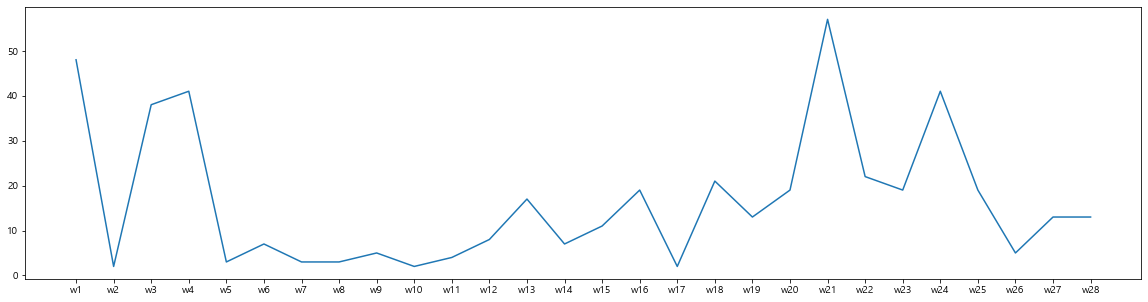

In [21]:
plt.figure(figsize=(20,5))
X = ls_war_X2["War_id"]
y_1 = ls_war_X2["Count_country"]
plt.plot(X, y_1)
plt.show()

In [22]:
#### (그래프)전쟁별 전쟁규모

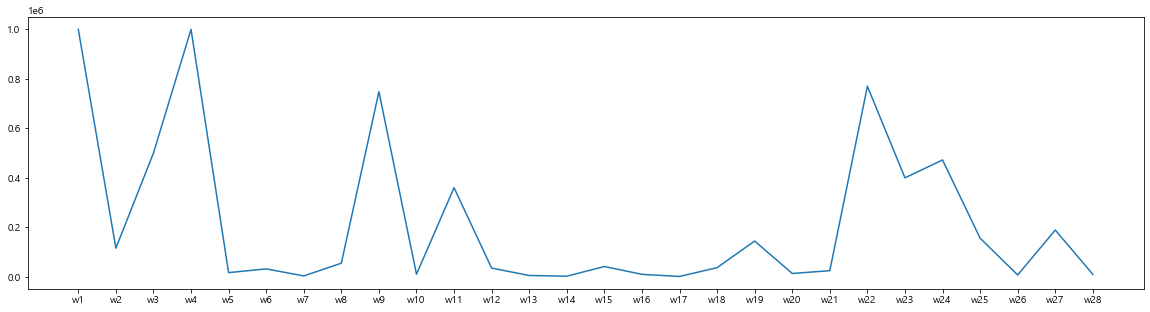

In [23]:
plt.figure(figsize=(20,5))
X = ls_war_X2["War_id"]
y_2 = ls_war_X2["War_volume"]
plt.plot(X, y_2)
plt.show()

In [24]:
### (1)-1 전쟁종류(민족간전쟁/해적/마약/테러)별 전쟁수 count

In [53]:
ls_war_X2 = pd.read_excel("datas/ls_war.xls", "sheet")
ls_war_X2 = ls_war_X2.drop(["Unnamed: 0","전쟁수"], axis=1)
ls_war_X2["Count"] = 1
ls_war_X2["War_volume"] = ls_war_X2["참전국수"]
ls_war_X2.head()

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3


In [54]:
war_genre = ls_war_X2.pivot_table("Count","갈등종류", aggfunc=np.sum, fill_value=0)
war_genre["War_genre"]= war_genre.index
war_genre

,Count,War_genre
갈등종류,,
내란,12,내란
마약,2,마약
민족,2,민족
테러,10,테러
해적,2,해적


In [26]:
#### (그래프) 2000년이후 갈등종류별 전쟁수

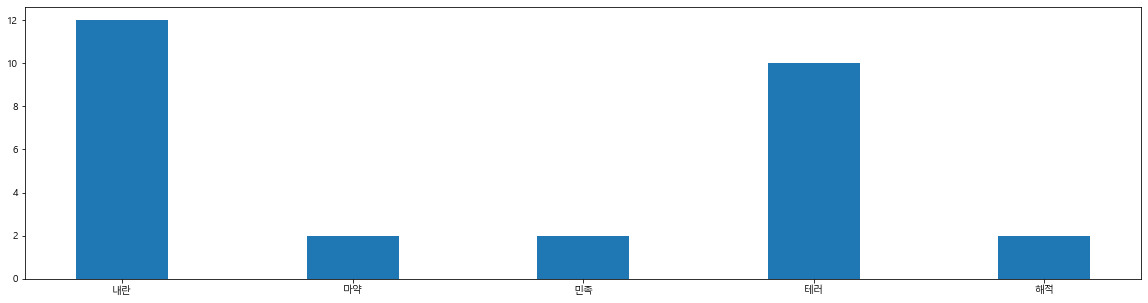

In [55]:
plt.figure(figsize=(20,5))
X = war_genre["War_genre"]
y = war_genre["Count"]
plt.bar(X, y, width=0.4)
plt.show()

In [28]:
### (1)-2 전쟁참전국수별 (0~20, 21~40, 41개국이상) 전쟁수 count

In [73]:
 # 10개국 미만 참전 "소규모"
a_1= ls_war_X2[ls_war_X2["참전국수"]<=10]
a_1.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2


In [74]:
# 11~20개국 참전 "중간규모"
b_1= ls_war_X2[(ls_war_X2["참전국수"] > 10)&(ls_war_X2["참전국수"] <= 20)] 
b_1.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
12,2007-02-06,영원한자유작전-트랜스사하라,테러,5325,17,1,17


In [75]:
 # 20개국 초과 참전 "대규모"
c_1= ls_war_X2[(ls_war_X2["참전국수"] > 20)]
c_1.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48


##### 코멘트
- 2000년대 이후 10개국 미만 참전한 소규모 전쟁 12개
- 11~20개국이 참전한 중간규모의 전쟁이 9개
- 20개국이상의 국가가 참전한 대규모 전쟁이 7개
- 여러국가가 참전하는 대규모 전쟁은 2001년 9.11 테러와의 전쟁을 기점으로 중동지역 집중

In [76]:
len(a_1), len(b_1), len(c_1)

(12, 9, 7)

In [77]:
c_1

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
17,2011-02-15,리비아내전,내란,37000,21,1,21
20,2012-01-16,북부말리전쟁,테러,24764,57,1,57
21,2013-12-30,이라크 내전,내란,770000,22,1,22
23,2014-06-13,ISIL에대한국제군사개입,테러,472260,41,1,41


In [32]:
#### (그래프) 2000년이후 전쟁의 참전국 규모에 따른 전쟁수(소,중,대)

In [33]:
### (1)-3 전쟁규모별 (병력수 1k이하, 10k미만, 10k이상) 전쟁수 count

In [78]:
# 병력 3만미만 참전 "S1"
a_2= ls_war_X2[ls_war_X2["전쟁규모"]<30*1000]
a_2.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3


In [79]:
# 3~50만병력 참전 "S2"
b_2= ls_war_X2[(ls_war_X2["전쟁규모"] >= 30*1000)&(ls_war_X2["전쟁규모"] < 500*1000)] 
b_2.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2


In [80]:
# 50만이상 병력투입
c_2= ls_war_X2[(ls_war_X2["전쟁규모"] >= 500*1000)] 
c_2.head(1)

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48


##### 코멘트
- 병력 연인원 투입규모 50만명 이상인 전쟁이 5개
- 테러와의 전쟁을 시작으로 테러와의 후속전쟁에 지속적인 병력이 투입되고 있음
- 이들 전쟁의 참전국가들도 대규모급
- 의견->여러국가들에 의해 대규모 병력이 투입된 전쟁은 해당국가의 이해관계가 좀더 집중되어 있다고 판단할 수 있을까? 

In [81]:
len(a_2), len(b_2), len(c_2)

(11, 12, 5)

In [82]:
c_2

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
9,2006-02-22,이라크내전,내란,748000,5,1,5
21,2013-12-30,이라크 내전,내란,770000,22,1,22


In [37]:
#### (그래프) 2000년이후 전쟁병력규모에 따른 전쟁수

In [38]:
## (2) Symbol별 ABS_idx

In [84]:

df_final = pd.read_excel("./datas/final_X.xls",'final_X')

df_final = df_final.drop(["Unnamed: 0"], axis=1)
df_final["Count"] = 1
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Change         1018 non-null   float64       
 1   Symbol         1018 non-null   object        
 2   Industry       1018 non-null   object        
 3   Change_idx     1017 non-null   float64       
 4   ABS_idx        1017 non-null   float64       
 5   Avg_change     1018 non-null   float64       
 6   Start_date     1018 non-null   datetime64[ns]
 7   War_genre      1018 non-null   object        
 8   War_name       1018 non-null   object        
 9   War_volume     1018 non-null   int64         
 10  Count_country  1018 non-null   int64         
 11  Count          1018 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 95.6+ KB


In [85]:
df_final.tail(2)

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
1016,-0.0426,BABA,소프트웨어 및 IT서비스,1065.0,1065.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1
1017,-0.0025,PYPL,소프트웨어 및 IT서비스,62.0,62.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1


##### 코멘트
- 2000년대 이후 총 23개의 전쟁
- 미국 시총 상위 100대 기업 중 51개
- 20개의 카테고리(인더스트리)
- 총 1018개의 ABS_idx 분석

In [97]:
print(len(df_final.groupby("Start_date").size().reset_index()),
     len(df_final.groupby("Symbol").size().reset_index()),
     len(df_final.groupby("Industry").size().reset_index()),
     len(df_final))

23 51 20 1018


In [98]:
### (2)-1 ABS_idx 0~199 / 200이상 Sympbol 수 -> 비율도 보기

In [40]:
s_count_1 = df_final[(df_final["ABS_idx"] < 200)] # 
s_count_2 = df_final[(df_final["ABS_idx"] >= 200)]
len(s_count_1), len(s_count_2)

(523, 494)

In [100]:
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

##### 코멘트
- ABS_idx box plot으로 분석
- 중앙값 170
- upper fence 950
- q1 point 67
- q3 point 421
- 향후 비교를 위한 기준 중앙값 170보다 큰 200을 구간으로 전쟁영향여부 판단

In [104]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final['ABS_idx'], name='ABS IDX'))
fig.show();

##### 코멘트
- ABS_idx 200기준 전체 심볼비중
- 총 1,018개의 ABS_idx 테이터 중 200이상인 종목은 전체 51%
- 비중 49%를 비교를 위한 기준점으로 활용

In [99]:
s_count_ratio = len(s_count_2) / (len(s_count_1) + len(s_count_2) )
len(df_final), len(s_count_1), len(s_count_2), round(s_count_ratio,2)

(1018, 523, 494, 0.49)

### 2-1 전쟁종류별 ABS_idx 200 비중

In [134]:
#### 전쟁종류별비중 ( 정리 요망)
s_count_11 = df_final[(df_final["War_genre"] ==  "내란")]
s_count_11_1 = s_count_11[(df_final["ABS_idx"] < 200)]
s_count_11_2 = s_count_11[(df_final["ABS_idx"] >= 200)]
s_count_11_ratio = len(s_count_11_2) / (len(s_count_11_1)+len(s_count_11_2))
len(s_count_11_1), len(s_count_11_2), round(s_count_11_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(247, 210, 0.46)

In [44]:
s_count_12 = df_final[(df_final["War_genre"] ==  "민족")]
s_count_12_1 = s_count_12[(df_final["ABS_idx"] < 200)]
s_count_12_2 = s_count_12[(df_final["ABS_idx"] >= 200)]
s_count_12_ratio = len(s_count_12_2) / (len(s_count_12_1)+len(s_count_12_2))
len(s_count_12_1), len(s_count_12_2), round(s_count_12_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(25, 15, 0.38)

In [45]:
s_count_13 = df_final[(df_final["War_genre"] ==  "테러")]
s_count_13_1 = s_count_13[(df_final["ABS_idx"] < 200)]
s_count_13_2 = s_count_13[(df_final["ABS_idx"] >= 200)]
s_count_13_ratio = len(s_count_13_2) / (len(s_count_13_1)+len(s_count_13_2))
len(s_count_13_1), len(s_count_13_2), round(s_count_13_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(171, 172, 0.5)

In [46]:
s_count_14 = df_final[(df_final["War_genre"] ==  "마약")]
s_count_14_1 = s_count_14[(df_final["ABS_idx"] < 200)]
s_count_14_2 = s_count_14[(df_final["ABS_idx"] >= 200)]
s_count_14_ratio = len(s_count_14_2) / (len(s_count_14_1)+len(s_count_14_2))
len(s_count_14_1), len(s_count_14_2), round(s_count_14_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(52, 37, 0.42)

In [47]:
s_count_15 = df_final[(df_final["War_genre"] ==  "해적")]
s_count_15_1 = s_count_15[(df_final["ABS_idx"] < 200)]
s_count_15_2 = s_count_15[(df_final["ABS_idx"] >= 200)]
s_count_15_ratio = len(s_count_15_2) / (len(s_count_15_1)+len(s_count_15_2))
len(s_count_15_1), len(s_count_15_2), round(s_count_15_ratio, 2)

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\metahong\anaconda3\envs\fc17\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(28, 60, 0.68)

#### 코멘트
- 전체|내란|민족|테러|마약|해적
- 해적소탕 전쟁에서의 68%의 종목에서 주가변동에 영향을 받았음

In [48]:
# 전쟁 반발시 100대기업의 51% 종목이 영향을 받는데
# 해적관련된 전쟁일 경우 영향을 받는 종목이 67%로 가장 많았고
# 테러, 마약관련 전쟁의 경우 50% 수준
# 민족간의 갈등전쟁에서는 상대적으로 적은 종목이 영향을 받음

# 이거 DataFrame으로 정리해서 그래프로 그리기

In [111]:
 round(s_count_ratio,2),round(s_count_11_ratio, 2), round(s_count_12_ratio, 2), round(s_count_13_ratio, 2),round(s_count_14_ratio, 2), round(s_count_15_ratio, 2)

(0.49, 0.46, 0.38, 0.5, 0.42, 0.68)

In [113]:
df_final.head(1)

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
0,-0.0323,AAPL,"컴퓨터, 전화 및 가전제품",269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48,1


### 2-2 전쟁참전국가 규모별 ABS_idx 200 비중

In [126]:
# 전쟁참전규모가 스몰급일 때 ABS_idx 200 이상 종목 비중
lv_small = df_final[df_final["Count_country"]<=10]
lv_small_0 = lv_small[lv_small["ABS_idx"]<200]
lv_small_200 = lv_small[lv_small["ABS_idx"]>=200]
ratio_small_200 = round(len(lv_small_200)/len(lv_small),2)
len(lv_small), len(lv_small_0), len(lv_small_200), ratio_small_200

(426, 216, 210, 0.49)

In [127]:
# 전쟁참전규모가 중간급일 때 ABS_idx 200 이상 종목 비중
lv_middle = df_final[(df_final["Count_country"] > 10)&(df_final["Count_country"] <= 20)]
lv_middle_0 = lv_middle[lv_middle["ABS_idx"]<200]
lv_middle_200 = lv_middle[lv_middle["ABS_idx"]>=200]
ratio_middle_200 = round(len(lv_middle_200)/len(lv_middle),2)
len(lv_middle), len(lv_middle_0), len(lv_middle_200), ratio_middle_200

(281, 137, 144, 0.51)

In [129]:
# 전쟁참전규모가 대규모일 때 ABS_idx 200 이상 종목 비중
lv_big = df_final[df_final["Count_country"] > 20]
lv_big_0 = lv_big[lv_big["ABS_idx"]<200]
lv_big_200 = lv_big[lv_big["ABS_idx"]>=200]
ratio_big_200 = round(len(lv_big_200)/len(lv_big),2)
len(lv_big), len(lv_big_0), len(lv_big_200), ratio_big_200

(311, 170, 140, 0.45)

##### 코멘트
- 전쟁참전 규모의 경우에 참전국가수가 중간 규모일 때 큰폭의 주가변동을 하는 종목비중이 커짐

In [132]:
round(s_count_ratio,2), ratio_small_200, ratio_middle_200, ratio_big_200

(0.49, 0.49, 0.51, 0.45)

### 2-3 전쟁병력규모별 ABS_idx 200 비중

In [141]:
scale1 = df_final[df_final["War_volume"]<30*1000]
scale1_0 = scale1[scale1["ABS_idx"]<200]
scale1_200 = scale1[scale1["ABS_idx"]>=200]
ratio_scale1_200 = round(len(scale1_200)/len(scale1),2)
len(scale1), len(scale1_0), len(scale1_200), ratio_scale1_200

(310, 182, 128, 0.41)

In [142]:
scale2 = df_final[(df_final["War_volume"] >= 30*1000)&(df_final["War_volume"] < 500*1000)] 
scale2_0 = scale2[scale2["ABS_idx"]<200]
scale2_200 = scale2[scale2["ABS_idx"]>=200]
ratio_scale2_200 = round(len(scale2_200)/len(scale2),2)
len(scale2), len(scale2_0), len(scale2_200), ratio_scale2_200

(497, 234, 262, 0.53)

In [144]:
scale3 = df_final[df_final["War_volume"] >= 500*1000] 
scale3_0 = scale3[scale3["ABS_idx"]<200]
scale3_200 = scale3[scale3["ABS_idx"]>=200]
ratio_scale3_200 = round(len(scale3_200)/len(scale3),2)
len(scale3), len(scale3_0), len(scale3_200), ratio_scale3_200

(211, 107, 104, 0.49)

##### 코멘트
- 전쟁참전국수 역시 3만~50만명 투입 전쟁에서 큰폭의 주가변동 종목 비중 커짐

In [147]:
round(s_count_ratio,2), ratio_scale1_200, ratio_scale2_200, ratio_scale3_200

(0.49, 0.41, 0.53, 0.49)

### 2-4 INDUSTRY별 ABS_idx 200 비중

In [156]:
df_final.tail(2)

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
1016,-0.0426,BABA,소프트웨어 및 IT서비스,1065.0,1065.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1
1017,-0.0025,PYPL,소프트웨어 및 IT서비스,62.0,62.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1


In [152]:
industry = df_final.groupby(["Industry"]).size().reset_index()
industry["id"] = industry.index

,Industry,0,id
0,"개인, 가정 용품 및 서비스",23,0
1,다양한 소매업,23,1
2,메탈&마이닝,23,2
3,미디어 및 출판,46,3
4,반도체 및 반도체 장비,125,4
5,섬유 및 의류,23,5
6,소프트웨어 및 IT서비스,189,6
7,식품 및 약품소매,23,7
8,오일 및 가스,46,8
9,은행,69,9


In [158]:
df_industry = pd.merge(df_final, industry, on="Industry")
df_industry.tail(1)

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count,0,id
1017,0.0067,WMT,식품 및 약품소매,-335.0,335.0,-0.002,2014-09-16,내란,예멘내전,156000,19,1,23,7


In [159]:
# industry 0 : 개인, 가정용품 및 서비스 : 74%
industry0 = df_industry[df_industry["id"]==0]
industry0_0 = industry0[industry0["ABS_idx"]<200]
industry0_200 = industry0[industry0["ABS_idx"]>=200]
ratio_industry0_200 = round(len(industry0_200)/len(industry0),2)
len(industry0), len(industry0_0), len(industry0_200), ratio_industry0_200

(23, 6, 17, 0.74)

In [161]:
# industry 1 : 다양한 소매업 : 43%
industry1 = df_industry[df_industry["id"]==1]
industry1_0 = industry1[industry1["ABS_idx"]<200]
industry1_200 = industry1[industry1["ABS_idx"]>=200]
ratio_industry1_200 = round(len(industry1_200)/len(industry1),2)
len(industry1), len(industry1_0), len(industry1_200), ratio_industry1_200

(23, 13, 10, 0.43)

In [165]:
# industry 2 : 메탈&마이닝 : 48%
industry2 = df_industry[df_industry["id"]==2]
industry2_0 = industry2[industry2["ABS_idx"]<200]
industry2_200 = industry2[industry2["ABS_idx"]>=200]
ratio_industry2_200 = round(len(industry2_200)/len(industry2),2)
len(industry2), len(industry2_0), len(industry2_200), ratio_industry2_200

(23, 12, 11, 0.48)

In [166]:
# industry 3 : 미디어 및 출판 : 35%
industry3 = df_industry[df_industry["id"]==3]
industry3_0 = industry3[industry3["ABS_idx"]<200]
industry3_200 = industry3[industry3["ABS_idx"]>=200]
ratio_industry3_200 = round(len(industry3_200)/len(industry3),2)
len(industry3), len(industry3_0), len(industry3_200), ratio_industry3_200

(46, 30, 16, 0.35)

In [167]:
# industry 4 : 반도체 및 반도체 장비 : 51%
industry4 = df_industry[df_industry["id"]==4]
industry4_0 = industry4[industry4["ABS_idx"]<200]
industry4_200 = industry4[industry4["ABS_idx"]>=200]
ratio_industry4_200 = round(len(industry4_200)/len(industry4),2)
len(industry4), len(industry4_0), len(industry4_200), ratio_industry4_200

(125, 61, 64, 0.51)

In [169]:
# industry 5 : 섬유및의류 : 70%
industry5 = df_industry[df_industry["id"]==5]
industry5_0 = industry5[industry5["ABS_idx"]<200]
industry5_200 = industry5[industry5["ABS_idx"]>=200]
ratio_industry5_200 = round(len(industry5_200)/len(industry5),2)
len(industry5), len(industry5_0), len(industry5_200), ratio_industry5_200

(23, 7, 16, 0.7)

In [172]:
# industry 6 : 소프트웨어 및 IT서비스 : 52%
industry6 = df_industry[df_industry["id"]==6]
industry6_0 = industry6[industry6["ABS_idx"]<200]
industry6_200 = industry6[industry6["ABS_idx"]>=200]
ratio_industry6_200 = round(len(industry6_200)/len(industry6),2)
len(industry6), len(industry6_0), len(industry6_200), ratio_industry6_200

(189, 90, 99, 0.52)

In [174]:
# industry 7 : 식품 및 약품소매 : 52%
industry7 = df_industry[df_industry["id"]==7]
industry7_0 = industry7[industry7["ABS_idx"]<200]
industry7_200 = industry7[industry7["ABS_idx"]>=200]
ratio_industry7_200 = round(len(industry7_200)/len(industry7),2)
len(industry7), len(industry7_0), len(industry7_200), ratio_industry7_200

(23, 11, 12, 0.52)

In [178]:
# industry 8 : 오일 및 가스 : 54%
industry8 = df_industry[df_industry["id"]==8]
industry8_0 = industry8[industry8["ABS_idx"]<200]
industry8_200 = industry8[industry8["ABS_idx"]>=200]
ratio_industry8_200 = round(len(industry8_200)/len(industry8),2)
len(industry8), len(industry8_0), len(industry8_200), ratio_industry8_200

(46, 21, 25, 0.54)

In [184]:
# industry 10 : 음료 : 52%
industry10 = df_industry[df_industry["id"]==10]
industry10_0 = industry10[industry10["ABS_idx"]<200]
industry10_200 = industry10[industry10["ABS_idx"]>=200]
ratio_industry10_200 = round(len(industry10_200)/len(industry10),2)
len(industry10), len(industry10_0), len(industry10_200), ratio_industry10_200

(46, 22, 24, 0.52)

In [187]:
# industry 11 : 자동차 및 자동차부품 : 34%
industry11 = df_industry[df_industry["id"]==11]
industry11_0 = industry11[industry11["ABS_idx"]<200]
industry11_200 = industry11[industry11["ABS_idx"]>=200]
ratio_industry11_200 = round(len(industry11_200)/len(industry11),2)
len(industry11), len(industry11_0), len(industry11_200), ratio_industry11_200

(32, 21, 11, 0.34)

In [190]:
# industry 12 : 전문품 상점 : 43%
industry12 = df_industry[df_industry["id"]==12]
industry12_0 = industry12[industry12["ABS_idx"]<200]
industry12_200 = industry12[industry12["ABS_idx"]>=200]
ratio_industry12_200 = round(len(industry12_200)/len(industry12),2)
len(industry12), len(industry12_0), len(industry12_200), ratio_industry12_200

(23, 13, 10, 0.43)

In [195]:
# industry 13 : 제약 : 40%
industry13 = df_industry[df_industry["id"]==13]
industry13_0 = industry13[industry13["ABS_idx"]<200]
industry13_200 = industry13[industry13["ABS_idx"]>=200]
ratio_industry13_200 = round(len(industry13_200)/len(industry13),2)
len(industry13), len(industry13_0), len(industry13_200), ratio_industry13_200

(120, 71, 48, 0.4)

In [198]:
# industry 14 : 커뮤니케이션 및 네트워킹 : 43%
industry14 = df_industry[df_industry["id"]==14]
industry14_0 = industry14[industry14["ABS_idx"]<200]
industry14_200 = industry14[industry14["ABS_idx"]>=200]
ratio_industry14_200 = round(len(industry14_200)/len(industry14),2)
len(industry14), len(industry14_0), len(industry14_200), ratio_industry14_200

(23, 13, 10, 0.43)

In [201]:
# industry 15 : 컴퓨터,전화및가전제품 : 48%
industry15 = df_industry[df_industry["id"]==15]
industry15_0 = industry15[industry15["ABS_idx"]<200]
industry15_200 = industry15[industry15["ABS_idx"]>=200]
ratio_industry15_200 = round(len(industry15_200)/len(industry15),2)
len(industry15), len(industry15_0), len(industry15_200), ratio_industry15_200

(23, 12, 11, 0.48)

In [204]:
# industry 16 : 통신 서비스 : 54%
industry16 = df_industry[df_industry["id"]==16]
industry16_0 = industry16[industry16["ABS_idx"]<200]
industry16_200 = industry16[industry16["ABS_idx"]>=200]
ratio_industry16_200 = round(len(industry16_200)/len(industry16),2)
len(industry16), len(industry16_0), len(industry16_200), ratio_industry16_200

(46, 21, 25, 0.54)

In [206]:
# industry 17 : 헬스케어 업체 및 서비스 : 52%
industry17 = df_industry[df_industry["id"]==17]
industry17_0 = industry17[industry17["ABS_idx"]<200]
industry17_200 = industry17[industry17["ABS_idx"]>=200]
ratio_industry17_200 = round(len(industry17_200)/len(industry17),2)
len(industry17), len(industry17_0), len(industry17_200), ratio_industry17_200

(23, 11, 12, 0.52)

In [207]:
# industry 18 : 헬스케어 장비 및 용품 : 41%
industry18 = df_industry[df_industry["id"]==18]
industry18_0 = industry18[industry18["ABS_idx"]<200]
industry18_200 = industry18[industry18["ABS_idx"]>=200]
ratio_industry18_200 = round(len(industry18_200)/len(industry18),2)
len(industry18), len(industry18_0), len(industry18_200), ratio_industry18_200

(69, 41, 28, 0.41)

In [209]:
# industry 19 : 호텔 및 엔터테인먼트: 48%
industry19 = df_industry[df_industry["id"]==19]
industry19_0 = industry19[industry19["ABS_idx"]<200]
industry19_200 = industry19[industry19["ABS_idx"]>=200]
ratio_industry19_200 = round(len(industry19_200)/len(industry19),2)
len(industry19), len(industry19_0), len(industry19_200), ratio_industry19_200

(23, 12, 11, 0.48)

In [211]:
industry

,Industry,0,id
0,"개인, 가정 용품 및 서비스",23,0
1,다양한 소매업,23,1
2,메탈&마이닝,23,2
3,미디어 및 출판,46,3
4,반도체 및 반도체 장비,125,4
5,섬유 및 의류,23,5
6,소프트웨어 및 IT서비스,189,6
7,식품 및 약품소매,23,7
8,오일 및 가스,46,8
9,은행,69,9


##### 코멘트
- 개인,가정용품 및 서비스 품목과 섬유 및 의류 품목 변동종목 비중 70% 이상으로 영향 많이 받는 카테고리
- 상대적으로 미디어 및 출판, 자동차및자동차부품은 상대적으로 전쟁영향 덜 받는 품목

In [214]:
# 개인, 가정용품 및 서비스 품목은 P&G 한종목에서 200이상 영향(17개 전쟁에서 영향)
industry0_200.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,PG,17


In [216]:
# 섬유 및 의류 품목은 나이키한종목에서 200이상 영향(16개 전쟁에서 영향)
industry5_200.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,NKE,16


In [220]:
# 자동차 및 자동차부품 중 카테고리에서
# TM은 총 23개의 전쟁 중 8개, 테슬라는 9개의 전쟁 중 3개의 전쟁기간에만 주가변동 폭 큼

In [217]:
industry11_0.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,TM,15
1,TSLA,6


In [218]:
industry11_200.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,TM,8
1,TSLA,3


In [221]:
industry3_0.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,CMCSA,15
1,DIS,15


In [223]:
industry3_200.groupby(["Symbol"]).size().reset_index()

,Symbol,0
0,CMCSA,8
1,DIS,8
